In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as mso

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
data=pd.read_csv("Dhaka_weather.csv")
data.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-16,0.0,27.0,15.8,11.2,partly cloudy
1,02-01-16,0.0,27.0,15.6,13.0,clear
2,03-01-16,0.0,25.0,15.8,18.4,partly cloudy
3,04-01-16,0.0,26.0,15.7,14.8,partly cloudy
4,05-01-16,0.0,25.1,15.8,13.0,clear
5,06-01-16,0.0,25.6,16.0,11.2,clear
6,07-01-16,0.0,26.0,16.0,11.2,partly cloudy
7,08-01-16,0.0,26.1,15.0,11.2,partly cloudy
8,09-01-16,0.0,25.0,17.0,16.6,partly cloudy
9,10-01-16,0.0,24.1,17.8,9.4,partly cloudy


In [3]:
data.shape

(2929, 6)

**Visualization data**

<Axes: xlabel='weather', ylabel='count'>

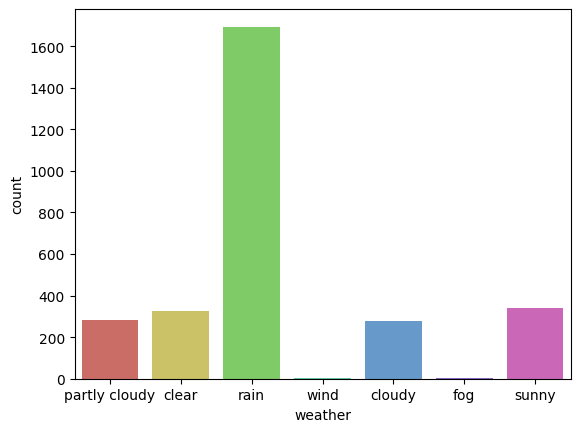

In [4]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(x="weather",data=data,palette='hls')

In [5]:
count_partly=len(data[data.weather=='partly cloudy'])
count_clear=len(data[data.weather=='clear'])
count_rain=len(data[data.weather=='rain'])
count_wind=len(data[data.weather=='wind'])
count_cloudy=len(data[data.weather=='cloudy'])
count_fog=len(data[data.weather=='fog'])
count_sunny=len(data[data.weather=='sunny'])

print('percent of partly cloudy:{:2f}%'.format((count_partly/(len(data.weather))*100)))
print('percent of clear:{:2f}%'.format((count_clear/(len(data.weather))*100)))
print('percent of rain:{:2f}%'.format((count_rain/(len(data.weather))*100)))
print('percent of wind:{:2f}%'.format((count_wind/(len(data.weather))*100)))
print('percent of cloudy:{:2f}%'.format((count_cloudy/(len(data.weather))*100)))
print('percent of fog:{:2f}%'.format((count_fog/(len(data.weather))*100)))
print('percent of sunny:{:2f}%'.format((count_sunny/(len(data.weather))*100)))

percent of partly cloudy:9.696142%
percent of clear:11.095937%
percent of rain:57.835439%
percent of wind:0.170707%
percent of cloudy:9.457153%
percent of fog:0.102424%
percent of sunny:11.642199%


In [6]:
data[['precipitation','temp_max','temp_min','wind']].describe()

,precipitation,temp_max,temp_min,wind
count,2929.000000,2929.000000,2929.000000,2929.000000
mean,8.565586,31.100922,23.237965,10.411670
std,17.282925,3.502521,4.525064,11.282944
min,0.000000,17.000000,9.000000,0.000000
25%,0.000000,29.000000,19.800000,1.840000
50%,1.000000,32.000000,25.000000,7.600000
75%,10.300000,34.000000,27.000000,18.400000
max,209.500000,40.300000,30.000000,222.500000


<Axes: xlabel='wind', ylabel='Count'>

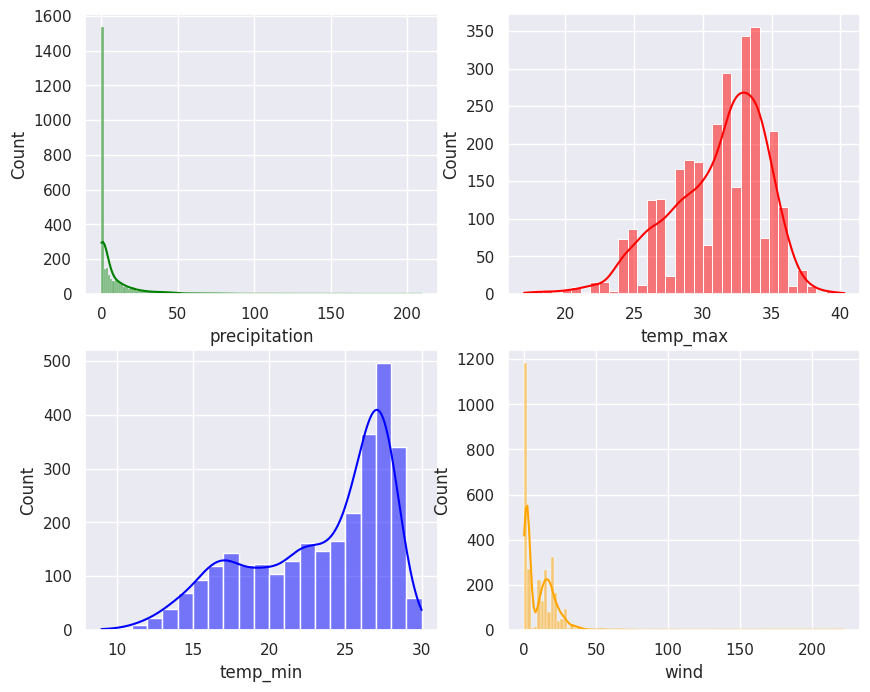

In [7]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x='precipitation',kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x='temp_max',kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x='temp_min',kde=True,ax=axs[1,0],color='blue')
sns.histplot(data=data,x='wind',kde=True,ax=axs[1,1],color='orange')

<Axes: xlabel='wind'>

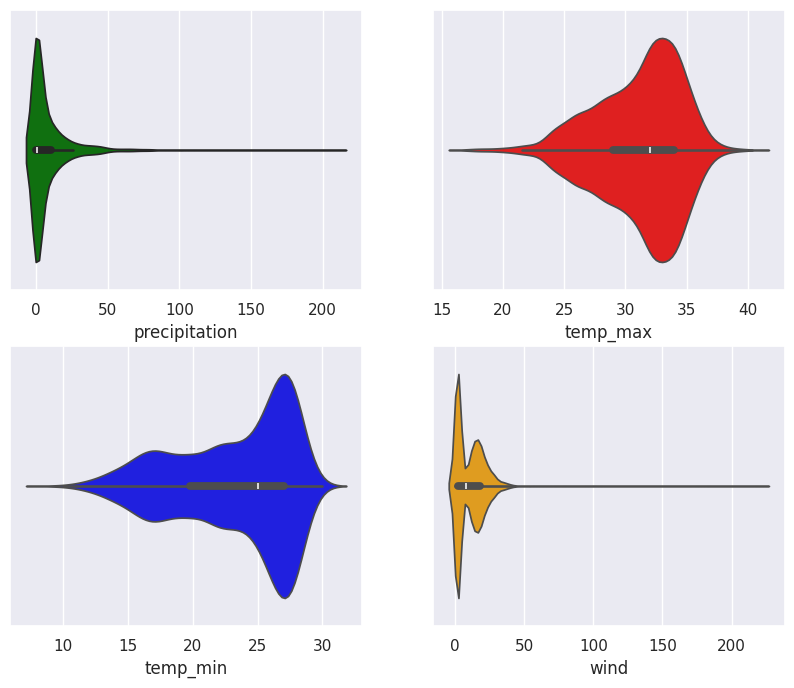

In [8]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=data,x='precipitation',ax=axs[0,0],color='green')
sns.violinplot(data=data,x='temp_max',ax=axs[0,1],color='red')
sns.violinplot(data=data,x='temp_min',ax=axs[1,0],color='blue')
sns.violinplot(data=data,x='wind',ax=axs[1,1],color='orange')

<Axes: xlabel='precipitation', ylabel='weather'>

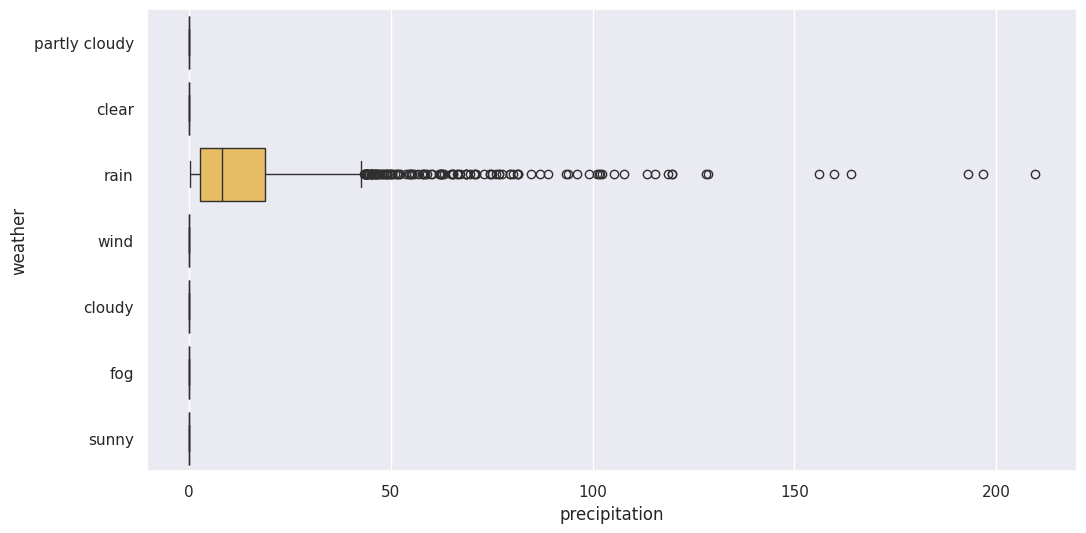

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(x='precipitation',y='weather',data=data,palette='YlOrBr')

<Axes: xlabel='temp_max', ylabel='weather'>

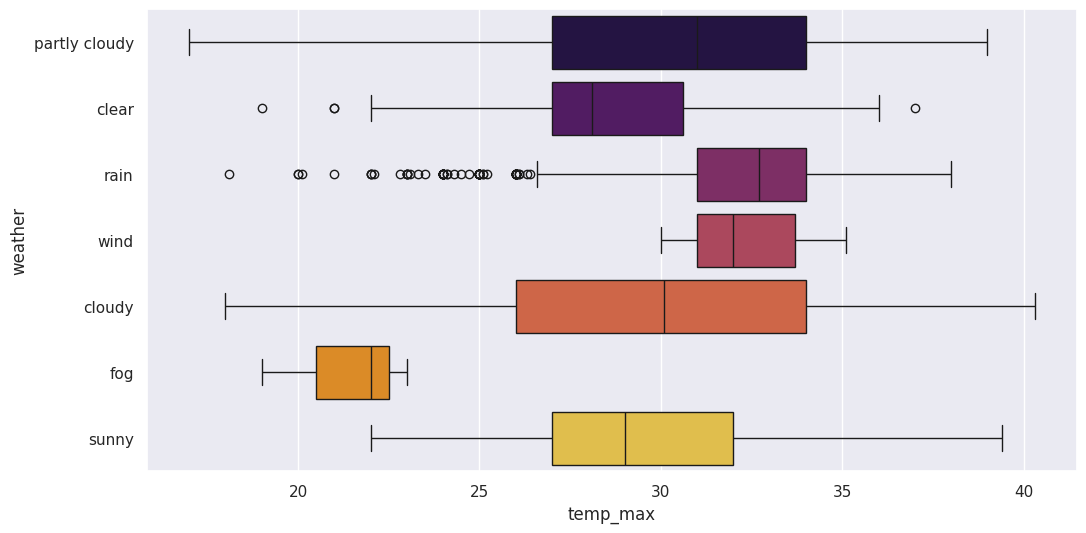

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(x='temp_max',y='weather',data=data,palette='inferno')

<Axes: xlabel='temp_min', ylabel='weather'>

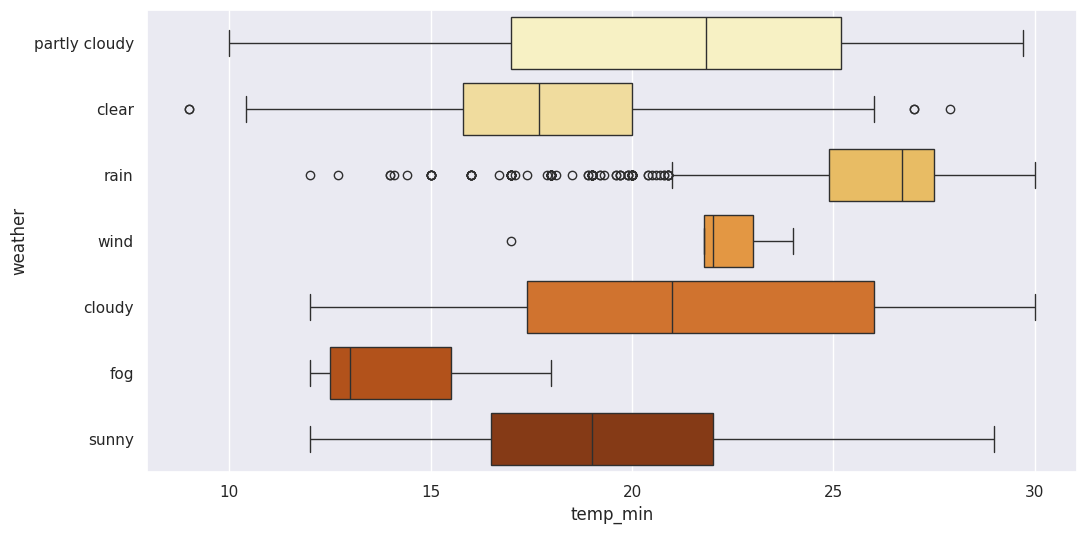

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(x='temp_min',y='weather',data=data,palette='YlOrBr')

<Axes: xlabel='wind', ylabel='weather'>

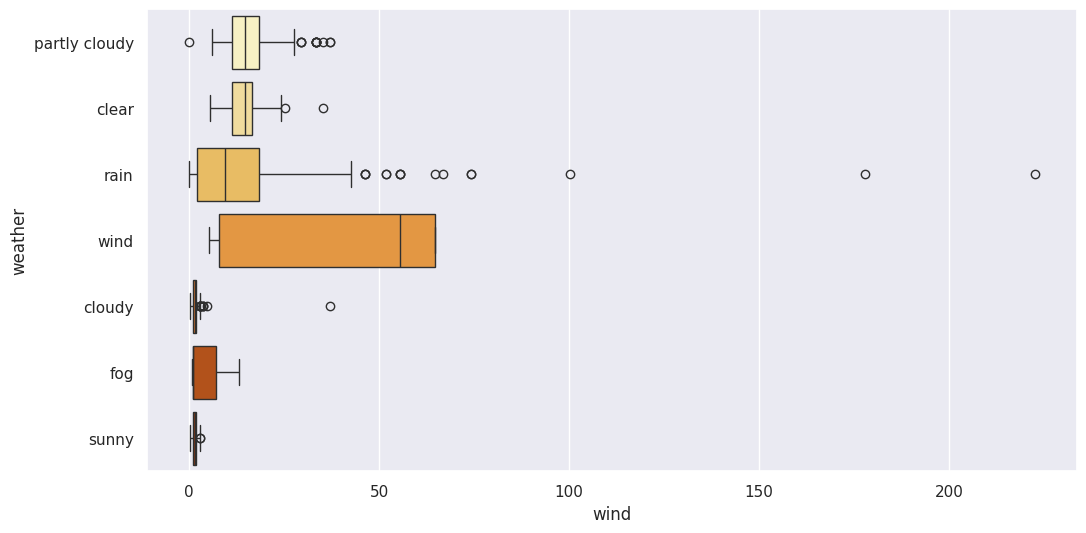

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x='wind',y='weather',data=data,palette='YlOrBr')

In [13]:
#plt.figure(figsize=(12,6))
#sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

pearsons correlation:  -0.012828981883510086
T test and P value:  TtestResult(statistic=-69.16182855444987, pvalue=0.0, df=5856.0)


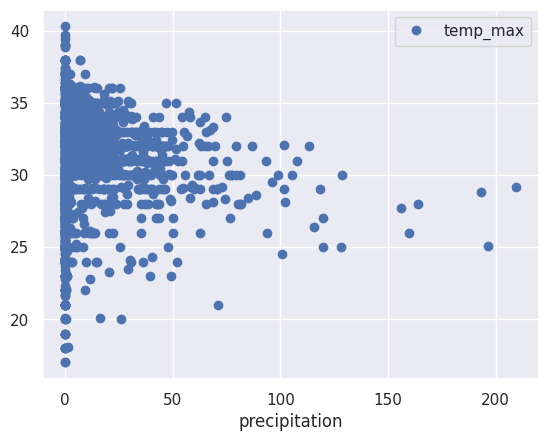

In [14]:
data.plot("precipitation",'temp_max',style='o')
print('pearsons correlation: ',data['precipitation'].corr(data['temp_max']))
print('T test and P value: ',stats.ttest_ind(data['precipitation'],data['temp_max']))

pearsons correlation:  0.08302175803301871
T test and P value:  TtestResult(statistic=-94.77735763874321, pvalue=0.0, df=5856.0)


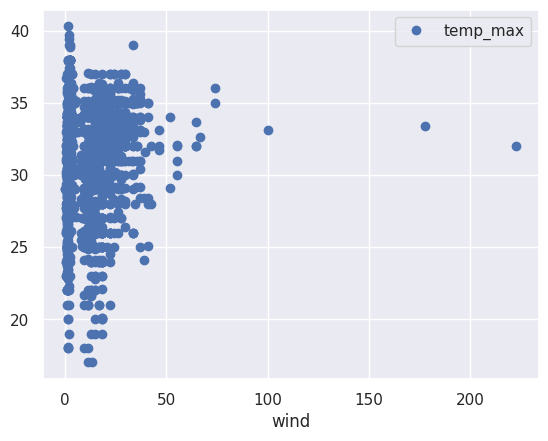

In [15]:
data.plot("wind",'temp_max',style='o')
print('pearsons correlation: ',data['wind'].corr(data['temp_max']))
print('T test and P value: ',stats.ttest_ind(data['wind'],data['temp_max']))

<Axes: xlabel='temp_max'>

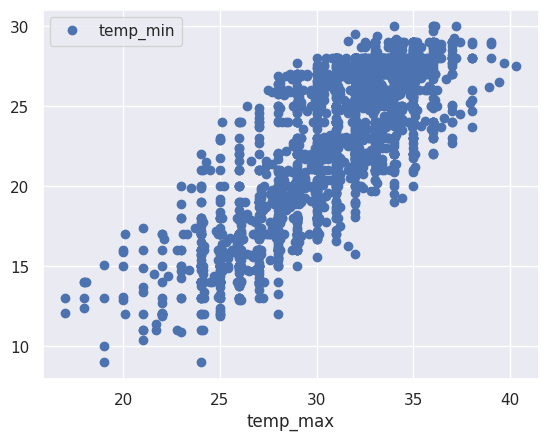

In [16]:
data.plot('temp_max','temp_min',style='o')

**Checking Null values**

In [17]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

<Axes: >

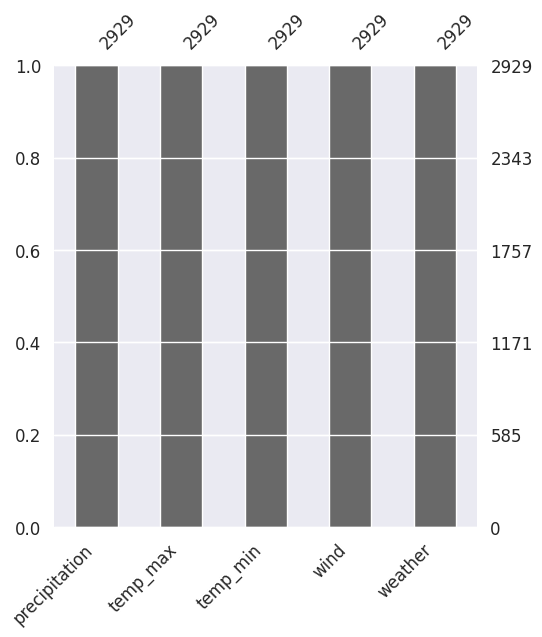

In [18]:
plt.figure(figsize=(12,6))
axz=plt.subplot(1,2,2)
mso.bar(data.drop(['date'],axis=1),ax=axz,fontsize=12)

**Dropping unnecessary data**

In [19]:
data=data.drop(['date'],axis=1)

In [20]:
#Q1=data.quantile(0.25)
#Q3=data.quantile(0.75)
#IQR=Q3-Q1
#data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]

In [21]:
import numpy as np
data.precipitation=np.sqrt(data.precipitation)
data.wind=np.sqrt(data.wind)

<Axes: xlabel='wind', ylabel='Count'>

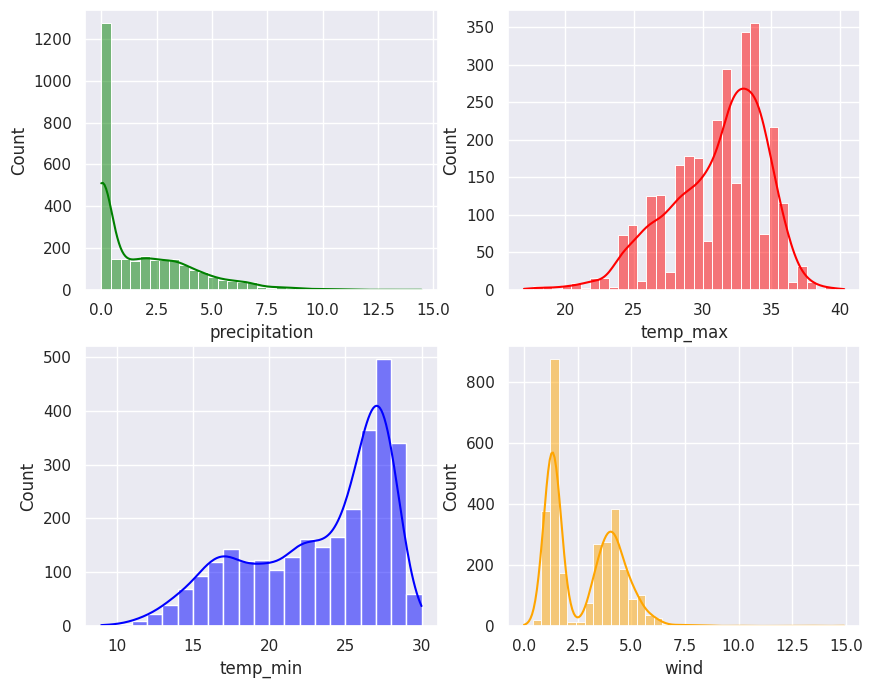

In [22]:
sns.set(style='darkgrid')
fig, axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='blue')
sns.histplot(data=data,x="wind",kde=True,ax=axs[1,1],color='orange')

In [23]:
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,27.0,15.8,3.346640,partly cloudy
1,0.0,27.0,15.6,3.605551,clear
2,0.0,25.0,15.8,4.289522,partly cloudy
3,0.0,26.0,15.7,3.847077,partly cloudy
4,0.0,25.1,15.8,3.605551,clear


**Encoding**

In [24]:
le=LabelEncoder()
data['weather']=le.fit_transform(data['weather'])

In [25]:
data.head(100)

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,27.0,15.8,3.346640,3
1,0.000000,27.0,15.6,3.605551,0
2,0.000000,25.0,15.8,4.289522,3
3,0.000000,26.0,15.7,3.847077,3
4,0.000000,25.1,15.8,3.605551,0
...,...,...,...,...,...
95,0.000000,30.4,26.8,6.090977,1
96,0.547723,35.0,26.0,5.431390,4
97,0.000000,35.1,27.7,5.263079,3
98,0.000000,35.3,27.4,4.722288,3


**Splittiing**

In [26]:
#x=((data.loc[:,data.columns!='weather']).astype(int)).values[:,0:]
x=data.drop(['weather'],axis=1).values
y=data['weather'].values

In [27]:
data.weather.unique()

array([3, 0, 4, 6, 1, 2, 5])

**Train-Test**

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

**Random Forest Classifier**

In [29]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
print('RF accuracy:{:.2f}%'.format(rf.score(x_test,y_test)*100))

RF accuracy:83.11%


In [30]:
rf_pred=rf.predict(x_test)
confusion_matrix(y_test,rf_pred)

array([[ 40,   0,   0,  19,   0,   0,   0],
       [  0,  23,   0,   1,   0,  29,   0],
       [  0,   1,   0,   1,   0,   0,   0],
       [ 23,   0,   0,  40,   0,   0,   0],
       [  0,   0,   0,   0, 332,   0,   0],
       [  0,  24,   0,   0,   0,  52,   0],
       [  0,   0,   0,   1,   0,   0,   0]])

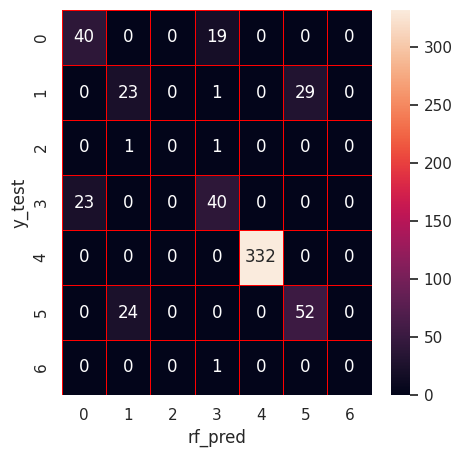

In [31]:
cm = confusion_matrix (y_test,rf_pred)
f, ax =plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("rf_pred")
plt.ylabel("y_test")
plt.show()

In [32]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.63      0.68      0.66        59
           1       0.48      0.43      0.46        53
           2       0.00      0.00      0.00         2
           3       0.65      0.63      0.64        63
           4       1.00      1.00      1.00       332
           5       0.64      0.68      0.66        76
           6       0.00      0.00      0.00         1

    accuracy                           0.83       586
   macro avg       0.49      0.49      0.49       586
weighted avg       0.83      0.83      0.83       586



**Logistic Regression**

In [33]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
print('LR accuracy:{:.2f}%'.format(lr.score(x_test,y_test)*100))

LR accuracy:84.30%


In [34]:
lr_pred=lr.predict(x_test)
confusion_matrix(y_test,lr_pred)

array([[ 45,   0,   0,  14,   0,   0,   0],
       [  0,  25,   0,   2,   0,  26,   0],
       [  0,   1,   0,   1,   0,   0,   0],
       [ 22,   0,   0,  41,   0,   0,   0],
       [  0,   1,   0,   0, 329,   2,   0],
       [  0,  22,   0,   0,   0,  54,   0],
       [  0,   0,   0,   1,   0,   0,   0]])

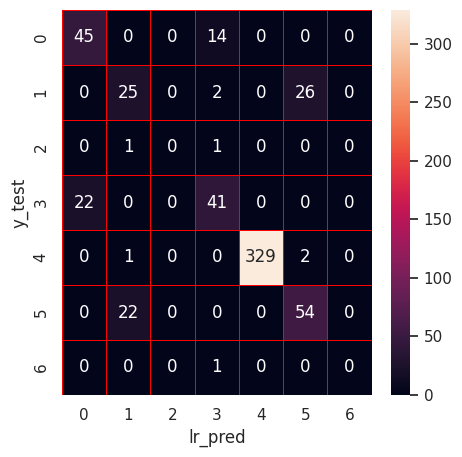

In [35]:
cm = confusion_matrix (y_test,lr_pred)
f, ax =plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("lr_pred")
plt.ylabel("y_test")
plt.show()

In [36]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71        59
           1       0.51      0.47      0.49        53
           2       0.00      0.00      0.00         2
           3       0.69      0.65      0.67        63
           4       1.00      0.99      1.00       332
           5       0.66      0.71      0.68        76
           6       0.00      0.00      0.00         1

    accuracy                           0.84       586
   macro avg       0.51      0.51      0.51       586
weighted avg       0.84      0.84      0.84       586



**K-Nearest Neighbour(KNN)**

In [37]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print('KNN accuracy:{:.2f}%'.format(knn.score(x_test,y_test)*100))

KNN accuracy:77.65%


In [38]:
knn_pred=knn.predict(x_test)
confusion_matrix(y_test,knn_pred)

array([[ 43,   0,   0,  15,   1,   0,   0],
       [  0,  18,   0,   0,   6,  29,   0],
       [  0,   1,   0,   1,   0,   0,   0],
       [ 27,   0,   0,  35,   1,   0,   0],
       [  5,   9,   0,   3, 308,   7,   0],
       [  0,  25,   0,   0,   0,  51,   0],
       [  0,   0,   0,   1,   0,   0,   0]])

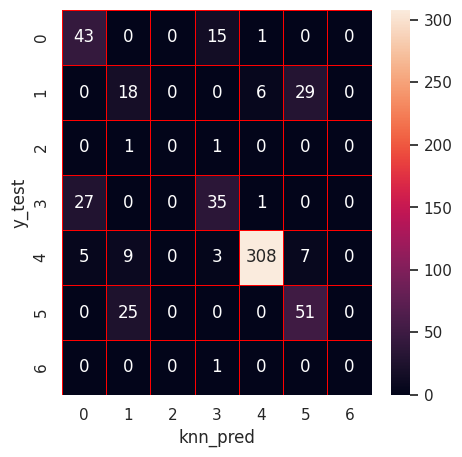

In [39]:
cm = confusion_matrix (y_test,knn_pred)
f, ax =plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("knn_pred")
plt.ylabel("y_test")
plt.show()

In [40]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.57      0.73      0.64        59
           1       0.34      0.34      0.34        53
           2       0.00      0.00      0.00         2
           3       0.64      0.56      0.59        63
           4       0.97      0.93      0.95       332
           5       0.59      0.67      0.63        76
           6       0.00      0.00      0.00         1

    accuracy                           0.78       586
   macro avg       0.44      0.46      0.45       586
weighted avg       0.79      0.78      0.78       586



**Support Vector Machine(SVM)**

In [41]:
svm=SVC()
svm.fit(x_train,y_train)
print('SVM accuracy:{:.2f}%'.format(svm.score(x_test,y_test)*100))

SVM accuracy:76.11%


In [42]:
svm_pred=svm.predict(x_test)
confusion_matrix(y_test,svm_pred)

array([[ 51,   0,   0,   2,   6,   0,   0],
       [  0,   3,   0,   0,  19,  31,   0],
       [  0,   0,   0,   1,   0,   1,   0],
       [ 26,   0,   0,   8,  29,   0,   0],
       [  5,   1,   0,   0, 316,  10,   0],
       [  0,   0,   0,   0,   8,  68,   0],
       [  0,   0,   0,   0,   1,   0,   0]])

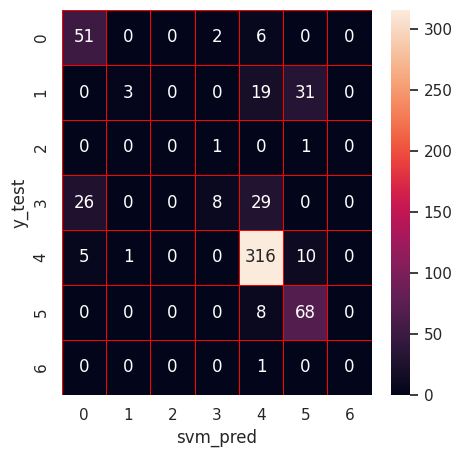

In [43]:
cm = confusion_matrix (y_test,svm_pred)
f, ax =plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("svm_pred")
plt.ylabel("y_test")
plt.show()

In [44]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.62      0.86      0.72        59
           1       0.75      0.06      0.11        53
           2       0.00      0.00      0.00         2
           3       0.73      0.13      0.22        63
           4       0.83      0.95      0.89       332
           5       0.62      0.89      0.73        76
           6       0.00      0.00      0.00         1

    accuracy                           0.76       586
   macro avg       0.51      0.41      0.38       586
weighted avg       0.76      0.76      0.70       586



**Gradient Boost**

In [45]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
print('GBC accuracy:{:.2f}%'.format(gbc.score(x_test,y_test)*100))

GBC accuracy:84.47%


In [46]:
gbc_pred=gbc.predict(x_test)
confusion_matrix(y_test,gbc_pred)

array([[ 43,   0,   0,  15,   0,   0,   1],
       [  0,  23,   0,   1,   0,  29,   0],
       [  0,   1,   0,   1,   0,   0,   0],
       [ 24,   0,   0,  39,   0,   0,   0],
       [  0,   0,   0,   0, 332,   0,   0],
       [  0,  18,   0,   0,   0,  58,   0],
       [  0,   0,   0,   1,   0,   0,   0]])

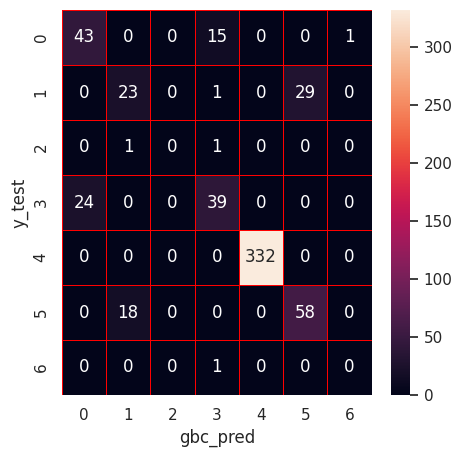

In [47]:
cm = confusion_matrix (y_test,gbc_pred)
f, ax =plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("gbc_pred")
plt.ylabel("y_test")
plt.show()

In [48]:
print(classification_report(y_test,gbc_pred))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68        59
           1       0.55      0.43      0.48        53
           2       0.00      0.00      0.00         2
           3       0.68      0.62      0.65        63
           4       1.00      1.00      1.00       332
           5       0.67      0.76      0.71        76
           6       0.00      0.00      0.00         1

    accuracy                           0.84       586
   macro avg       0.51      0.51      0.50       586
weighted avg       0.84      0.84      0.84       586



**Extreme Gradient Boosting(XGBC)**

In [49]:
# import warnings
# warnings.filterwarnings('ignore')
# xgb=XGBClassifier()
# xgb.fit(x_train,y_train)
# print('XGB accuracy:{:.2f}%'.format(xgb.score(x_test,y_test)*100))

In [50]:
# xgb_pred=xgb.predict(x_test)
# confusion_matrix(y_test,xgb_pred)

In [51]:
# cm = confusion_matrix (y_test,xgb_pred)
# f, ax =plt.subplots(figsize=(5,5))
# sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
# plt.xlabel("xgb_pred")
# plt.ylabel("y_test")
# plt.show()

In [52]:
# print(classification_report(y_test,xgb_pred))

**Gaussian Naive Bayes(GNB)**

In [53]:
# gnb=GaussianNB()
# gnb.fit(x_train,y_train)
# print('GNB accuracy:{:.2f}%'.format(gnb.score(x_test,y_test)*100))

In [54]:
# gnb_pred=gnb.predict(x_test)
# confusion_matrix(y_test,gnb_pred)

In [55]:
# cm = confusion_matrix (y_test,gnb_pred)
# f, ax =plt.subplots(figsize=(5,5))
# sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
# plt.xlabel("gnb_pred")
# plt.ylabel("y_test")
# plt.show()

In [56]:
# print(classification_report(y_test,bnb_pred))

**BernoulliNB(BNB)**

In [57]:
# bnb = BernoulliNB()
# bnb.fit(x_train,y_train)
# print('BNB accuracy:{:.2f}%'.format(bnb.score(x_test,y_test)*100))

In [58]:
# bnb_pred=bnb.predict(x_test)
# confusion_matrix(y_test,bnb_pred)

In [59]:
# cm = confusion_matrix (y_test,bnb_pred)
# f, ax =plt.subplots(figsize=(5,5))
# sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
# plt.xlabel("bnb_pred")
# plt.ylabel("y_test")
# plt.show()

In [60]:
# print(classification_report(y_test,gnb_pred))

**Comparison Table**

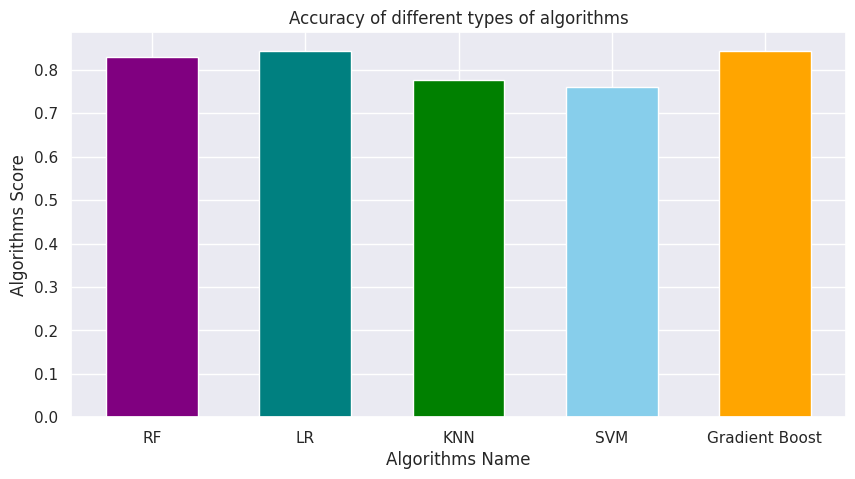

In [61]:
plt.figure(figsize=(10,5))
data = {'RF': rf.score(x_test, y_test), 'LR':lr.score(x_test, y_test) ,'KNN': knn.score(x_test, y_test), 'SVM': svm.score(x_test, y_test), 'Gradient Boost':gbc.score(x_test, y_test)}
Algorithm_name = list(data.keys())
Algorithm_score = list(data.values())
colors = ["purple", "teal", "green", "skyblue","orange"]
p=plt.bar(Algorithm_name, Algorithm_score, color =colors, width = 0.6)

plt.xlabel("Algorithms Name")
plt.ylabel("Algorithms Score")
plt.title("Accuracy of different types of algorithms")
plt.show()

**Evaluation**

In [62]:
input=[[1,50,11,55]]
ot=lr.predict(input)
print(ot)
print('the weather is:')
if(ot==0):
  print('cloudy')
elif (ot==1):
  print('fog')
elif (ot==2):
  print('rain')
elif (ot==3):
  print('sunny')
else:
  print('wind')

[0]
the weather is:
cloudy
